# Processing and Cleaning Data

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\Users\fatur\OneDrive\Dokumen\Papat\Data Analyst\Projects\end-to-end project itjob\itjob_clean.xlsx")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1331 entries, 0 to 1330
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  1331 non-null   int64  
 1   level                  1212 non-null   object 
 2   data_specialisation    1310 non-null   object 
 3   country                1331 non-null   object 
 4   avg_salary             1331 non-null   float64
 5   currency               1331 non-null   object 
 6   avg_salary_usd         1331 non-null   float64
 7   type_employment        1331 non-null   object 
 8   work_mode              1331 non-null   object 
 9   job_classification     1331 non-null   object 
 10  programming_languages  1331 non-null   object 
 11  tools_used             1331 non-null   object 
 12  education_level        1331 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 135.3+ KB


In [81]:
df.head()

,jobid,level,data_specialisation,country,avg_salary,currency,avg_salary_usd,type_employment,work_mode,job_classification,programming_languages,tools_used,education_level
0,16,Senior,Data Quality,Philippines,80000.0,PHP,1363.2,Full time,Unknown,Database Development & Administration _x000D_,"C++, Java, Python, Scala","Airflow, AWS, Azkaban, Cassandra, EMR, Hadoop,...",Bachelor Degree_x000D_
1,17,Middle,React,Philippines,67500.0,PHP,1150.2,Full time,Hybrid,Developers/Programmers _x000D_,"CSS, HTML, JSON, Typescript","Git, Google Cloud",_x000D_
2,18,Senior,Full Stack,Philippines,60000.0,PHP,1022.4,Full time,Hybrid,Developers/Programmers _x000D_,"CSS, HTML, Java, JavaScript","Azure, Bitbucket, CI/CD, Databricks, Docker, G...",Bachelor Degree_x000D_
3,19,Middle,C#,Philippines,35000.0,PHP,596.4,Full time,Office,Developers/Programmers _x000D_,"C#, VB.Net",".NET, MVC, React",Bachelor Degree_x000D_
4,21,Middle,Linux Administration,Philippines,0.0,PHP,0.0,Full time,Unknown,Networks & Systems Administration _x000D_,"Java, Scripting languages","Ansible, Facemaker, Git, HAProxy, Httpd, IIS, ...",Bachelor Degree_x000D_


In [82]:
df = df.replace({'_x000D_': ''}, regex=True)

In [83]:
df.head()

,jobid,level,data_specialisation,country,avg_salary,currency,avg_salary_usd,type_employment,work_mode,job_classification,programming_languages,tools_used,education_level
0,16,Senior,Data Quality,Philippines,80000.0,PHP,1363.2,Full time,Unknown,Database Development & Administration,"C++, Java, Python, Scala","Airflow, AWS, Azkaban, Cassandra, EMR, Hadoop,...",Bachelor Degree
1,17,Middle,React,Philippines,67500.0,PHP,1150.2,Full time,Hybrid,Developers/Programmers,"CSS, HTML, JSON, Typescript","Git, Google Cloud",
2,18,Senior,Full Stack,Philippines,60000.0,PHP,1022.4,Full time,Hybrid,Developers/Programmers,"CSS, HTML, Java, JavaScript","Azure, Bitbucket, CI/CD, Databricks, Docker, G...",Bachelor Degree
3,19,Middle,C#,Philippines,35000.0,PHP,596.4,Full time,Office,Developers/Programmers,"C#, VB.Net",".NET, MVC, React",Bachelor Degree
4,21,Middle,Linux Administration,Philippines,0.0,PHP,0.0,Full time,Unknown,Networks & Systems Administration,"Java, Scripting languages","Ansible, Facemaker, Git, HAProxy, Httpd, IIS, ...",Bachelor Degree


In [84]:
# check missing values per column
df.isna().sum()

jobid                      0
level                    119
data_specialisation       21
country                    0
avg_salary                 0
currency                   0
avg_salary_usd             0
type_employment            0
work_mode                  0
job_classification         0
programming_languages      0
tools_used                 0
education_level            0
dtype: int64

In [85]:
df['education_level'].replace(['', ' ', '  '], np.nan, inplace=True)
df['education_level'].value_counts(dropna=False)

C:\Users\fatur\AppData\Local\Temp\ipykernel_9268\652795779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education_level'].replace(['', ' ', '  '], np.nan, inplace=True)


education_level
Bachelor Degree     651
NaN                 537
Diploma              89
Degree (Any)         40
Master's Degree       9
College Degree        3
Associate Degree      2
Name: count, dtype: int64

In [86]:
df.isna().sum()

jobid                      0
level                    119
data_specialisation       21
country                    0
avg_salary                 0
currency                   0
avg_salary_usd             0
type_employment            0
work_mode                  0
job_classification         0
programming_languages      0
tools_used                 0
education_level          537
dtype: int64

In [87]:
# Fill missing values in 'level', 'data_specialisation', and 'education_level' columns with 'Unknown'
df['level'] = df['level'].fillna('Unknown')
df['data_specialisation'] = df['data_specialisation'].fillna('Unknown')
df['education_level'] = df['education_level'].fillna('Unknown')

In [88]:
df.isna().sum()

jobid                    0
level                    0
data_specialisation      0
country                  0
avg_salary               0
currency                 0
avg_salary_usd           0
type_employment          0
work_mode                0
job_classification       0
programming_languages    0
tools_used               0
education_level          0
dtype: int64

In [89]:
# check zero values per column
(df == 0.00).any()

jobid                    False
level                    False
data_specialisation      False
country                  False
avg_salary                True
currency                 False
avg_salary_usd            True
type_employment          False
work_mode                False
job_classification       False
programming_languages    False
tools_used               False
education_level          False
dtype: bool

In [90]:
# check sum of 0.00 value per column
(df == 0.00).sum()

jobid                      0
level                      0
data_specialisation        0
country                    0
avg_salary               447
currency                   0
avg_salary_usd           447
type_employment            0
work_mode                  0
job_classification         0
programming_languages      0
tools_used                 0
education_level            0
dtype: int64

In [91]:
# Persentage 0.00 value per column
(df == 0.00).sum() / len(df) * 100

jobid                     0.000000
level                     0.000000
data_specialisation       0.000000
country                   0.000000
avg_salary               33.583772
currency                  0.000000
avg_salary_usd           33.583772
type_employment           0.000000
work_mode                 0.000000
job_classification        0.000000
programming_languages     0.000000
tools_used                0.000000
education_level           0.000000
dtype: float64

In [92]:
# Replace 0 values in 'avg_salary' and 'avg_salary_usd' columns with NaN
df['avg_salary'] = df['avg_salary'].replace(0, np.nan)
df['avg_salary_usd'] = df['avg_salary_usd'].replace(0, np.nan)

In [93]:
(df == 0).sum()

jobid                    0
level                    0
data_specialisation      0
country                  0
avg_salary               0
currency                 0
avg_salary_usd           0
type_employment          0
work_mode                0
job_classification       0
programming_languages    0
tools_used               0
education_level          0
dtype: int64

In [94]:
percent_missing = df.isna().mean() * 100
print(percent_missing)

jobid                     0.000000
level                     0.000000
data_specialisation       0.000000
country                   0.000000
avg_salary               33.583772
currency                  0.000000
avg_salary_usd           33.583772
type_employment           0.000000
work_mode                 0.000000
job_classification        0.000000
programming_languages     0.000000
tools_used                0.000000
education_level           0.000000
dtype: float64


In [95]:
# Dropping rows with missing values in 'avg_salary' and 'avg_salary_usd'
# Reason:
# Since 'avg_salary_usd' is the main variable for salary analysis, imputing missing values 
# could introduce bias or distort the real relationship between salary and job level.
# Dropping these rows ensures that the analysis is based only on valid and factual data, 
# maintaining the integrity and accuracy of insights, even though approximately 33% of data is lost.
df = df.dropna(subset=['avg_salary'])
df = df.dropna(subset=['avg_salary_usd'])

In [96]:
df.isna().sum()

jobid                    0
level                    0
data_specialisation      0
country                  0
avg_salary               0
currency                 0
avg_salary_usd           0
type_employment          0
work_mode                0
job_classification       0
programming_languages    0
tools_used               0
education_level          0
dtype: int64

In [97]:
df.duplicated().sum()

np.int64(0)

In [98]:
df.isna().sum()

jobid                    0
level                    0
data_specialisation      0
country                  0
avg_salary               0
currency                 0
avg_salary_usd           0
type_employment          0
work_mode                0
job_classification       0
programming_languages    0
tools_used               0
education_level          0
dtype: int64

In [99]:
df.head()

,jobid,level,data_specialisation,country,avg_salary,currency,avg_salary_usd,type_employment,work_mode,job_classification,programming_languages,tools_used,education_level
0,16,Senior,Data Quality,Philippines,80000.0,PHP,1363.2,Full time,Unknown,Database Development & Administration,"C++, Java, Python, Scala","Airflow, AWS, Azkaban, Cassandra, EMR, Hadoop,...",Bachelor Degree
1,17,Middle,React,Philippines,67500.0,PHP,1150.2,Full time,Hybrid,Developers/Programmers,"CSS, HTML, JSON, Typescript","Git, Google Cloud",Unknown
2,18,Senior,Full Stack,Philippines,60000.0,PHP,1022.4,Full time,Hybrid,Developers/Programmers,"CSS, HTML, Java, JavaScript","Azure, Bitbucket, CI/CD, Databricks, Docker, G...",Bachelor Degree
3,19,Middle,C#,Philippines,35000.0,PHP,596.4,Full time,Office,Developers/Programmers,"C#, VB.Net",".NET, MVC, React",Bachelor Degree
6,26,Middle,JavaScript,Philippines,75000.0,PHP,1278.0,Full time,Unknown,Developers/Programmers,"CSS, HTML, Java, JavaScript","Databricks, Git, MongoDB, MySQL, Node.js, Orac...",Bachelor Degree


In [100]:
# Save the cleaned dataset to a new Excel file
# df.to_csv('datas_eda.csv', index=False)

# Exploratory Data Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 1329
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  884 non-null    int64  
 1   level                  884 non-null    object 
 2   data_specialisation    884 non-null    object 
 3   country                884 non-null    object 
 4   avg_salary             884 non-null    float64
 5   currency               884 non-null    object 
 6   avg_salary_usd         884 non-null    float64
 7   type_employment        884 non-null    object 
 8   work_mode              884 non-null    object 
 9   job_classification     884 non-null    object 
 10  programming_languages  884 non-null    object 
 11  tools_used             884 non-null    object 
 12  education_level        884 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 96.7+ KB


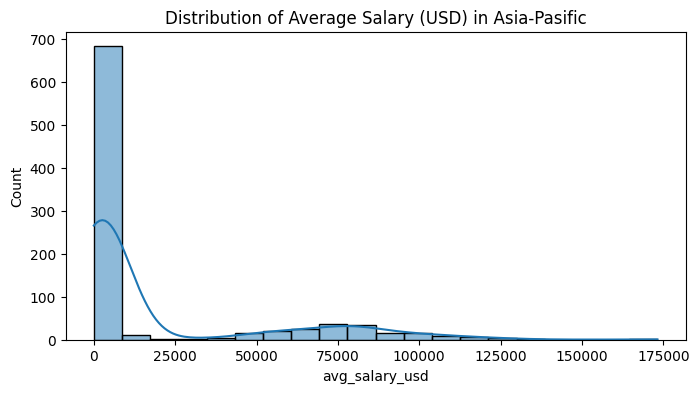

'The histogram shows that the salary distribution is heavily skewed to the right, \nwith the majority of workers earning low to mid-range salaries, \nand there are some indications of outliers in the high salary range.'

In [46]:
# Distribution of Average Salary (USD)
plt.figure(figsize=(8,4))
sns.histplot(df['avg_salary_usd'], bins=20, kde=True)
plt.title('Distribution of Average Salary (USD) in Asia-Pasific')
plt.show()

'''The histogram shows that the salary distribution is heavily skewed to the right, 
with the majority of workers earning low to mid-range salaries, 
and there are some indications of outliers in the high salary range.'''

In [47]:
# descriptive statistics for avg_salary_usd
df['avg_salary_usd'].describe()

# The minimum value has a very large range from the maximum, while the median value is much smaller than the mean.
# This indicates an outlier to the right/Positif Skew (Right-skewed) in the avg_salary_usd data

count       884.000000
mean      18765.173201
std       32344.756374
min           7.500000
25%        1196.045000
50%        3202.445000
75%        6567.950000
max      173223.750000
Name: avg_salary_usd, dtype: float64

In [48]:
# Identifying outliers using IQR method
Q1 = df['avg_salary_usd'].quantile(0.25)
Q3 = df['avg_salary_usd'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
outliers = df[(df['avg_salary_usd'] > upper_limit) | (df['avg_salary_usd'] < lower_limit)]
print(f'Number of outliers in avg_salary_usd: {len(outliers)}')

Number of outliers in avg_salary_usd: 191


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 1329
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  884 non-null    int64  
 1   level                  884 non-null    object 
 2   data_specialisation    884 non-null    object 
 3   country                884 non-null    object 
 4   avg_salary             884 non-null    float64
 5   currency               884 non-null    object 
 6   avg_salary_usd         884 non-null    float64
 7   type_employment        884 non-null    object 
 8   work_mode              884 non-null    object 
 9   job_classification     884 non-null    object 
 10  programming_languages  884 non-null    object 
 11  tools_used             884 non-null    object 
 12  education_level        884 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 96.7+ KB


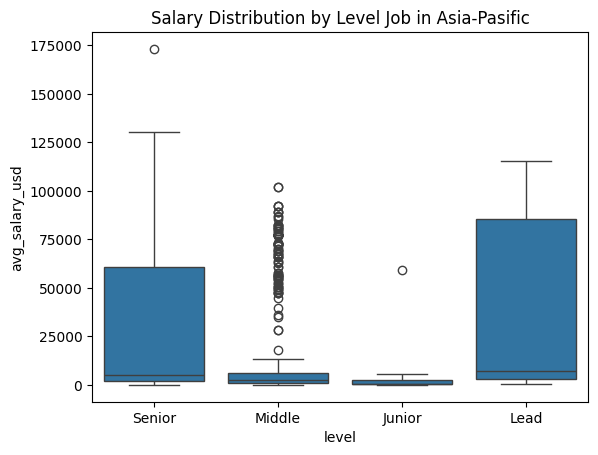

'HR must consider location factors (country, city, cost of living) or industry type (tech, finance, education).\nOne global standard cannot be established—a regional salary adjustment model is needed.'

In [50]:
# Boxplot of avg_salary_usd by level
sns.boxplot(data=df, x='level', y='avg_salary_usd')
plt.title('Salary Distribution by Level Job in Asia-Pasific')
plt.show()

# In general, salary increases at each level continue to increase, as seen from the increasingly median from junior-lead.
# There are many outliers at the middle level, this indicates that at this level there is a very large variation in salaries between workers.
# At the senior level, the interquartile range (IQR) is also wide, meaning that salary variation at this level is large.

'''HR must consider location factors (country, city, cost of living) or industry type (tech, finance, education).
One global standard cannot be established—a regional salary adjustment model is needed.'''

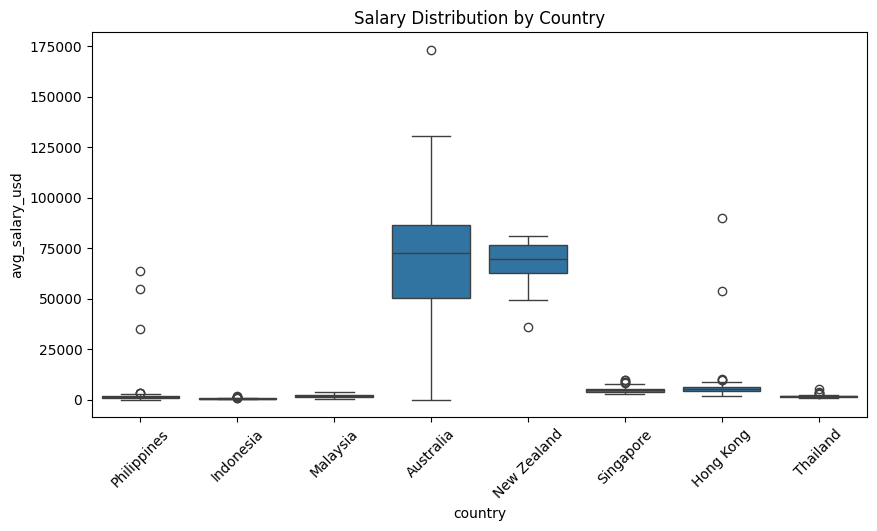

'HR can adapt global salary policies to the work location to remain competitive, for example:\nFor the same position, compensation in Australia can be 10 times that in Indonesia.\nTherefore, companies need to implement a localized pay structure to remain fair and efficient.'

In [51]:
# Salary vs Country
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='country', y='avg_salary_usd')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Country')
plt.show()

'''HR can adapt global salary policies to the work location to remain competitive, for example:
For the same position, compensation in Australia can be 10 times that in Indonesia.
Therefore, companies need to implement a localized pay structure to remain fair and efficient.'''

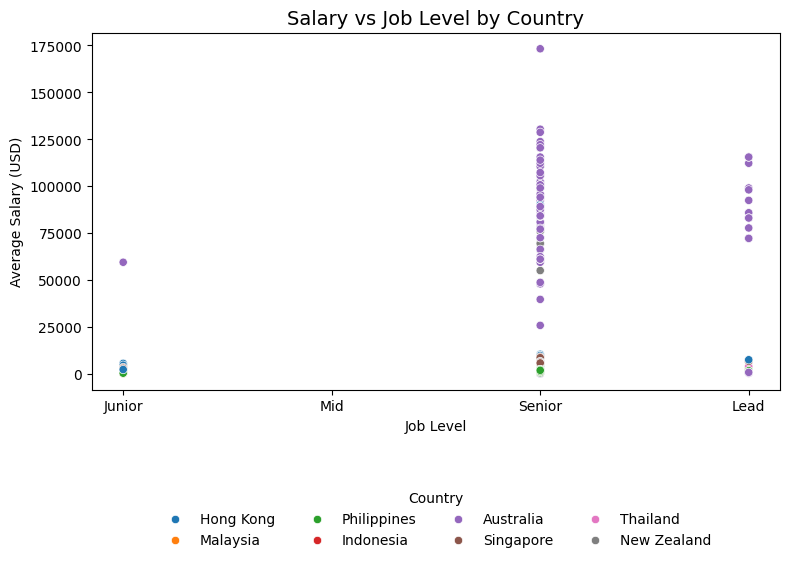

"Salaries increase with increasing levels (Junior → Mid → Senior → Lead), but the increase isn't always linear.\nAustralia and New Zealand stand out with significantly higher salary ranges than other countries at every level.\nThis means the cost of talent in these countries is very high."

In [52]:
# Salary vs Level by Country
order = ['Junior', 'Mid', 'Senior', 'Lead']
df['level'] = pd.Categorical(df['level'], categories=order, ordered=True)

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df.sort_values('level'),  # Sort data by level for better visualization
    x='level',
    y='avg_salary_usd',
    hue='country'
)

plt.title('Salary vs Job Level by Country', fontsize=14)
plt.xlabel('Job Level')
plt.ylabel('Average Salary (USD)')

# Customize legend
plt.legend(
    title='Country',
    bbox_to_anchor=(0.5, -0.25),
    loc='upper center',
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()

'''Salaries increase with increasing levels (Junior → Mid → Senior → Lead), but the increase isn't always linear.
Australia and New Zealand stand out with significantly higher salary ranges than other countries at every level.
This means the cost of talent in these countries is very high.'''

# HR can use this insight to adjust salary structures per country according to local market conditions

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 884 entries, 0 to 1329
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   jobid                  884 non-null    int64  
 1   level                  884 non-null    object 
 2   data_specialisation    884 non-null    object 
 3   country                884 non-null    object 
 4   avg_salary             884 non-null    float64
 5   currency               884 non-null    object 
 6   avg_salary_usd         884 non-null    float64
 7   type_employment        884 non-null    object 
 8   work_mode              884 non-null    object 
 9   job_classification     884 non-null    object 
 10  programming_languages  884 non-null    object 
 11  tools_used             884 non-null    object 
 12  education_level        884 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 96.7+ KB


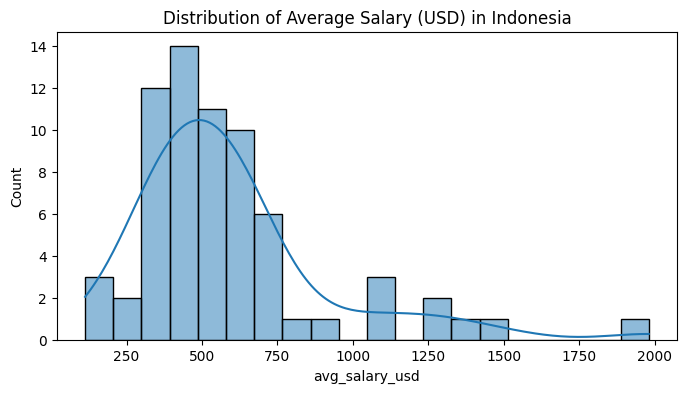

'The distribution is right-skewed (positively skewed).\nMost salaries are concentrated around $300 - $700 USD per month, while a few positions have much higher salaries (up to $2000 USD).\nThese higher values are rare but significant outliers, likely representing senior or specialized roles.'

In [102]:
# Filter data for Indonesia
indonesia_df = df[df['country'] == 'Indonesia']

# Distribution of Average Salary (USD)
plt.figure(figsize=(8,4))
sns.histplot(indonesia_df['avg_salary_usd'], bins=20, kde=True)
plt.title('Distribution of Average Salary (USD) in Indonesia')
plt.show()

'''The distribution is right-skewed (positively skewed).
Most salaries are concentrated around $300 - $700 USD per month, while a few positions have much higher salaries (up to $2000 USD).
These higher values are rare but significant outliers, likely representing senior or specialized roles.'''

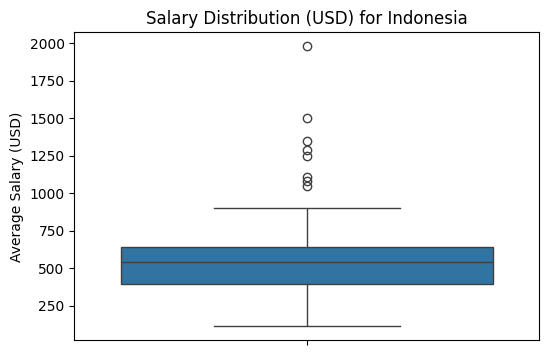

'there are outliers in the higher salary range for Indonesia'

In [103]:
# Filter data for Indonesia
indonesia_df = df[df['country'] == 'Indonesia']

# bloxplot of avg_salary_usd for Indonesia
plt.figure(figsize=(6,4))
sns.boxplot(data=indonesia_df, y='avg_salary_usd')
plt.title('Salary Distribution (USD) for Indonesia')
plt.ylabel('Average Salary (USD)')
plt.show()

'''there are outliers in the higher salary range for Indonesia'''

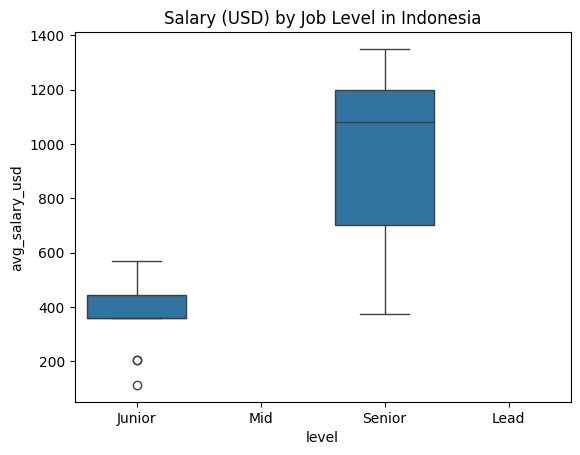

'there are outliers in the higher salary range for Indonesia, especially at the Senior and Lead levels.\nThis indicates there are it jobs with underpaid salaries than average.\nHR should conduct periodic market surveys to benchmark salaries against industry standards.'

In [56]:
# Boxplot of avg_salary_usd by level in Indonesia
sns.boxplot(data=indonesia_df, x='level', y='avg_salary_usd')
plt.title('Salary (USD) by Job Level in Indonesia')
plt.show()

'''there are outliers in the higher salary range for Indonesia, especially at the Senior and Lead levels.
This indicates there are it jobs with underpaid salaries than average.
HR should conduct periodic market surveys to benchmark salaries against industry standards.'''